In [7]:
import requests
import pandas as pd
import pdftables_api
from datetime import datetime, date, time, timedelta
import matplotlib.pyplot as plt

In [2]:
url="http://mapas.valencia.es/WebsMunicipales/uploads/atmosferica/7A_diciembre2018.pdf"
resp=requests.get(url)
print(resp)

<Response [200]>


In [3]:
path='C:\Datos_DW\TEMP\Datos_MEDIAMBIENTE'

In [4]:
with open(path+'\diciembre2018MA.pdf','wb') as output:
    output.write(resp.content)
    


In [ ]:
#Después de descargar el pdf de la página web del ayuntamiento de Valencia
#a través de una API convertimos el pdf en csv

#https://pdftables.com/blog/pdf-to-excel-with-python
#c = pdftables_api.Client('t160uj5a996f')
#c.csv(path+'\diciembre2018MA.pdf', path+'\diciembre2018MA.csv') 

In [ ]:
#el csv devuelto por el API es transformado en el "query editor de Excel" 
#realizando los siguientes procesos:
#
#     - eliminación de cualquier tipo de cabecera
#     - eliminación de cualquier linea en blanco.
#     - conversión a número de todos los valores.
#     - conversión de cualquier valor tipo "null" a 0
#     
# El resto de manipulación la haremos en Python.

In [2]:
# se crea un Dataframe a partir de los datos
datos = pd.read_csv('C:\Datos_DW\TEMP\Datos_MEDIAMBIENTE\Diciembre2018.csv',sep=";")

In [3]:
# visualizamos datos
datos.head(20)

,Contaminante\nFecha,SO 2\nμg/m3,NO\nμg/m3,NO 2\nμg/m3,PM10\nμg/m3,Ni\nng/m3,NO x\nμg/m3,Ozono\nμg/m3,As\nng/m3,Pb\nμg/m3,BaP\nng/m3,Cd\nng/m3
0,01/01/2018,4,0,0,19,912,0,68,28,1,0,8
1,02/01/2018,4,7,6,0,0,15,50,0,0,0,0
2,03/01/2018,5,4,10,0,0,16,37,0,0,0,0
3,04/01/2018,5,3,9,0,0,13,41,0,0,0,0
4,05/01/2018,4,4,16,23,0,21,43,0,0,0,0
5,06/01/2018,5,8,25,18,0,37,28,0,0,1,0
6,07/01/2018,5,6,18,12,661,27,44,14,1,0,3
7,08/01/2018,6,22,36,28,522,70,21,42,1,0,38
8,09/01/2018,4,6,19,15,0,28,35,0,0,0,0
9,10/01/2018,3,5,16,12,0,23,47,0,0,0,0


In [4]:
#Selecciono la columnas correspondientes a la fecha y al contaminante dióxido de nitrógeno.
datos_filtrados = datos.iloc[:,[0,3]]
#Renombro las etiquetas de los atributos
datos_filtrados.rename(columns={'Contaminante\nFecha': 'Fecha', 'NO 2\nμg/m3': 'NO2'}, inplace=True)
#Convierto la fecha importada del csv en fecha.
datos_filtrados["Fecha"]= pd.to_datetime(datos_filtrados["Fecha"],format='%d/%m/%Y')


C:\Users\Juan\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\Juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#Extraigo de la fecha el mes y la semana del año
datos_filtrados['Mes'] = pd.DatetimeIndex(datos_filtrados['Fecha']).month
datos_filtrados['Sem'] = pd.DatetimeIndex(datos_filtrados['Fecha']).weekofyear


C:\Users\Juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#realizamos dos dataframes. Uno agrupado por meses y otro agrupado por semanas
grupo_mes=datos_filtrados.groupby('Mes').agg({'NO2':'sum'})
grupo_semana=datos_filtrados.groupby('Sem').agg({'NO2':'sum'})

Text(0.5, 1.0, 'Contaminación NO2 en Plaza de España (Valencia) por semanas. Año 2018')

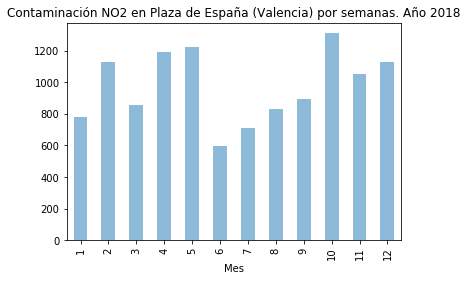

In [13]:
#Generamos un gráfico de barras con la contaminación por meses.
grupo_mes.NO2.plot(kind='bar', alpha=0.5)
plt.title('Contaminación NO2 en Plaza de España (Valencia) por semanas. Año 2018')

Text(0.5, 1.0, 'Contaminación NO2 en Plaza de España (Valencia) por meses. Año 2018')

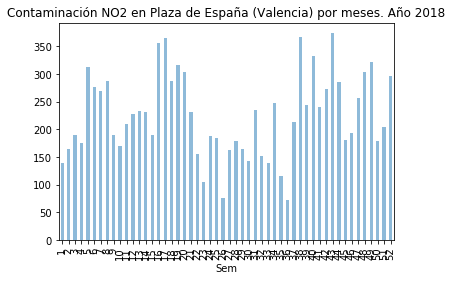

In [12]:
#Generamos un gráfico de barras con la contaminación por semanas.
grupo_semana.NO2.plot(kind='bar', alpha=0.5)
plt.title('Contaminación NO2 en Plaza de España (Valencia) por meses. Año 2018')